## Exploration of the data

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/home/elias/Projects/rossman_store_sales/data/raw/train.csv')

/tmp/ipykernel_10192/2696233355.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/home/elias/Projects/rossman_store_sales/data/raw/train.csv')


### Preprocessing

In [3]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
data.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
data.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [8]:
data.loc[data.StateHoliday == '0', 'StateHoliday'] = 0
data = pd.get_dummies(data, columns=['StateHoliday'], prefix='StateHoliday').drop(columns='StateHoliday_0')
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,0


In [9]:
data.nunique()

Store              1115
DayOfWeek             7
Date                942
Sales             21734
Customers          4086
Open                  2
Promo                 2
SchoolHoliday         2
StateHoliday_a        2
StateHoliday_b        2
StateHoliday_c        2
dtype: int64

In [10]:
bool_cols = ['Open', 'Promo', 'SchoolHoliday']
for col in bool_cols:
    data[col] = data[col].astype('uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Store           1017209 non-null  int64         
 1   DayOfWeek       1017209 non-null  int64         
 2   Date            1017209 non-null  datetime64[ns]
 3   Sales           1017209 non-null  int64         
 4   Customers       1017209 non-null  int64         
 5   Open            1017209 non-null  uint8         
 6   Promo           1017209 non-null  uint8         
 7   SchoolHoliday   1017209 non-null  uint8         
 8   StateHoliday_a  1017209 non-null  uint8         
 9   StateHoliday_b  1017209 non-null  uint8         
 10  StateHoliday_c  1017209 non-null  uint8         
dtypes: datetime64[ns](1), int64(4), uint8(6)
memory usage: 44.6 MB


### Exploration    

In [11]:
# How many entries per store we have
days_per_store = data.groupby('Store').Date.nunique()
days_per_store.value_counts()

942    934
758    180
941      1
Name: Date, dtype: int64

So the majority of stores have 942 entries, and a few 758

In [12]:
days_per_store[days_per_store == 758]

Store
13      758
20      758
22      758
32      758
36      758
       ... 
1094    758
1102    758
1104    758
1107    758
1109    758
Name: Date, Length: 180, dtype: int64

In [13]:
store_12 = data.loc[data.Store == 12, 'Date']
store_13 = data.loc[data.Store == 13, 'Date']

In [14]:
store_12.describe()

/tmp/ipykernel_10192/4137597999.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  store_12.describe()


count                     942
unique                    942
top       2015-07-31 00:00:00
freq                        1
first     2013-01-01 00:00:00
last      2015-07-31 00:00:00
Name: Date, dtype: object

In [15]:
store_13.describe()

/tmp/ipykernel_10192/3661706785.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  store_13.describe()


count                     758
unique                    758
top       2015-07-31 00:00:00
freq                        1
first     2013-01-01 00:00:00
last      2015-07-31 00:00:00
Name: Date, dtype: object

both the stores start and end on the same time. Let's see if we have jumps on time

In [16]:
(store_12 - store_12.shift(-1)).dropna().unique()

array([86400000000000], dtype='timedelta64[ns]')

In [17]:
(store_13 - store_13.shift(-1)).dropna().unique()

array([   86400000000000, 15984000000000000], dtype='timedelta64[ns]')

Okay, so we have a time gap on store 13

In [18]:
delta_times = (store_13 - store_13.shift(-1)).dropna()
delta_times[delta_times != '1 days']

235277   185 days
Name: Date, dtype: timedelta64[ns]

In [19]:
def find_time_gaps(data):
    days_store = data.groupby('Store').Date.nunique()
    stores_gap = days_store[days_store == 758].index.unique()
    
    gaps = []
    
    for store in stores_gap:
        store_dates = data.loc[data.Store == store, 'Date']
        delta_times = (store_dates - store_dates.shift(-1)).dropna()
        gaps.append(delta_times[delta_times != '1 days'])
        
    return gaps

In [20]:
gaps = find_time_gaps(data)
gaps

[235277   185 days
 Name: Date, dtype: timedelta64[ns],
 235284   185 days
 Name: Date, dtype: timedelta64[ns],
 235286   185 days
 Name: Date, dtype: timedelta64[ns],
 235296   185 days
 Name: Date, dtype: timedelta64[ns],
 235300   185 days
 Name: Date, dtype: timedelta64[ns],
 235305   185 days
 Name: Date, dtype: timedelta64[ns],
 235310   185 days
 Name: Date, dtype: timedelta64[ns],
 235315   185 days
 Name: Date, dtype: timedelta64[ns],
 235316   185 days
 Name: Date, dtype: timedelta64[ns],
 235322   185 days
 Name: Date, dtype: timedelta64[ns],
 235336   185 days
 Name: Date, dtype: timedelta64[ns],
 235340   185 days
 Name: Date, dtype: timedelta64[ns],
 235345   185 days
 Name: Date, dtype: timedelta64[ns],
 235353   185 days
 Name: Date, dtype: timedelta64[ns],
 235363   185 days
 Name: Date, dtype: timedelta64[ns],
 235364   185 days
 Name: Date, dtype: timedelta64[ns],
 235372   185 days
 Name: Date, dtype: timedelta64[ns],
 235377   185 days
 Name: Date, dtype: timedelta

all the stores have the same 185 days gap. Does the gaps happen at the same date?

In [21]:
pd.Series([len(x) for x in gaps]).unique()

array([1])

In [22]:
indexes_gaps = np.concatenate(np.array([x.index for x in gaps]))
data.loc[indexes_gaps].Date.unique()

array(['2015-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

So yes, all the gaps happens on the same date, the second semester of 2014

In [23]:
def plot_stores(data, stores, column):
    for store in stores:
        plt.plot(data.loc[data.Store == store, 'Date'], data.loc[data.Store == store, column], label=store)
    plt.legend()

Text(0.5, 1.0, 'Sales for some random stores')

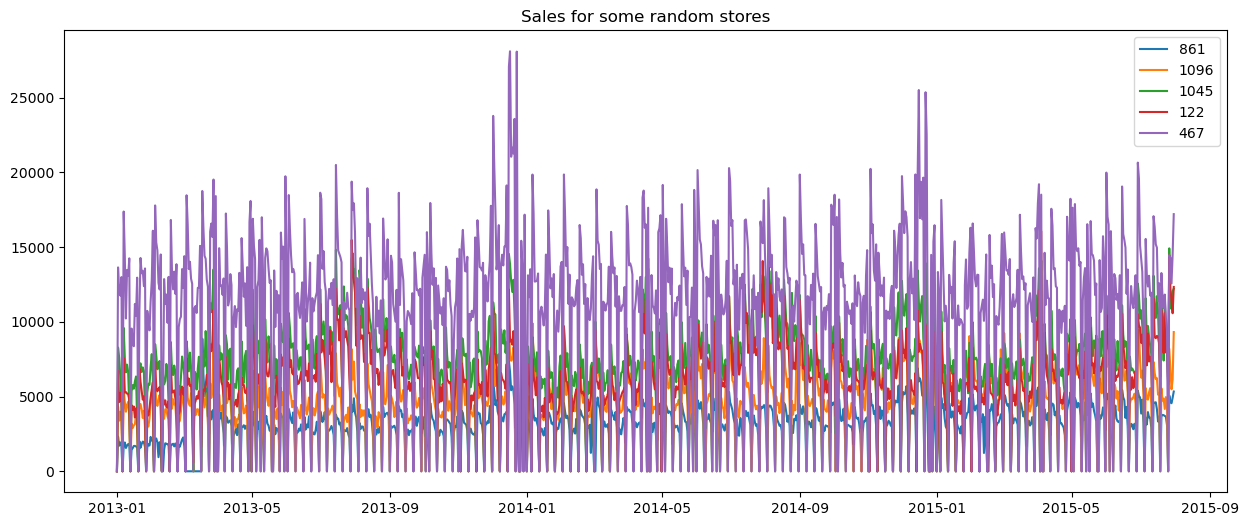

In [24]:
np.random.seed(42)

# Gere 20 números aleatórios entre 1 e 1115
stores = np.random.randint(1, 1116, size=5)


plt.figure(figsize=(15, 6))
plot_stores(data, stores, 'Sales')
plt.title('Sales for some random stores')

Text(0.5, 1.0, 'Customers for some random stores')

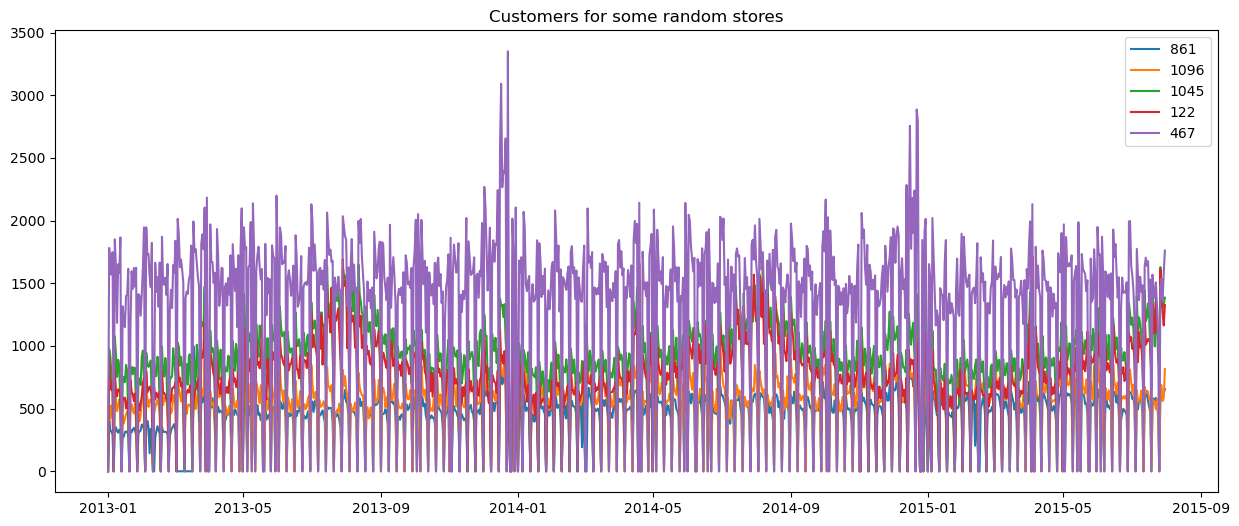

In [25]:
plt.figure(figsize=(15, 6))
plot_stores(data, stores, 'Customers')
plt.title('Customers for some random stores')

We can see strong periodical behaviour on the stores, some seasoning, and some similarities and differences between stores, probably because different locations.

### Correlations

In [26]:
cols_corr = [x for x in data.columns if x not in ['Store']]
cols_corr

['DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c']

/tmp/ipykernel_10192/3283912518.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df_selecionado.corr()


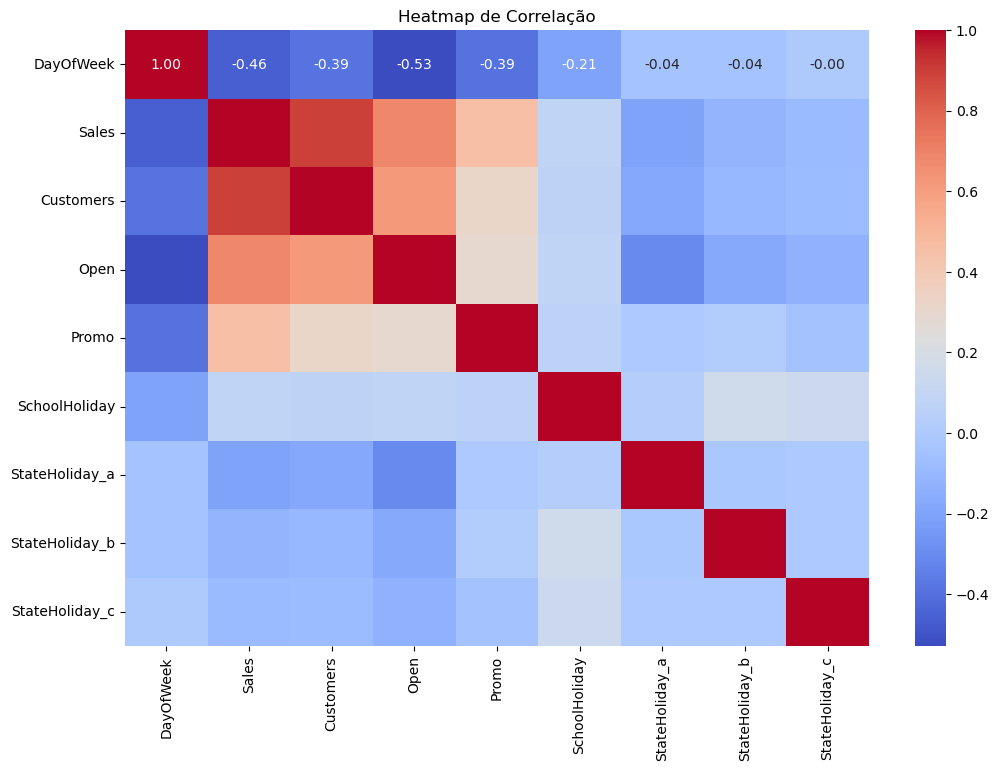

In [27]:
df_selecionado = data[cols_corr]

# Calcule a matriz de correlação
correlacao = df_selecionado.corr()

# Crie um heatmap usando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlação')
plt.show()

In [28]:
correlacao

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c
DayOfWeek,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.040981,-0.040668,-0.001345
Sales,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.203028,-0.117497,-0.092618
Customers,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.180900,-0.104522,-0.083007
Open,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,-0.302107,-0.175158,-0.137685
Promo,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,-0.004034,0.019847,-0.049964
SchoolHoliday,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,0.029126,0.159098,0.136405
StateHoliday_a,-0.040981,-0.203028,-0.180900,-0.302107,-0.004034,0.029126,1.000000,-0.011599,-0.009069
StateHoliday_b,-0.040668,-0.117497,-0.104522,-0.175158,0.019847,0.159098,-0.011599,1.000000,-0.005176
StateHoliday_c,-0.001345,-0.092618,-0.083007,-0.137685,-0.049964,0.136405,-0.009069,-0.005176,1.000000


We can see a strong correlation between sales and costumers. For the categorical variables we will need to use other way to find correlations

In [29]:
# first, lets one hot encode the day of week
data = pd.get_dummies(data, columns=['DayOfWeek'], prefix='day')
data

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,1,2015-07-31,5263,555,1,1,1,0,0,0,0,0,0,0,1,0,0
1,2,2015-07-31,6064,625,1,1,1,0,0,0,0,0,0,0,1,0,0
2,3,2015-07-31,8314,821,1,1,1,0,0,0,0,0,0,0,1,0,0
3,4,2015-07-31,13995,1498,1,1,1,0,0,0,0,0,0,0,1,0,0
4,5,2015-07-31,4822,559,1,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2013-01-01,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
1017205,1112,2013-01-01,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
1017206,1113,2013-01-01,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
1017207,1114,2013-01-01,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [30]:
data.columns

Index(['Store', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'day_1', 'day_2',
       'day_3', 'day_4', 'day_5', 'day_6', 'day_7'],
      dtype='object')

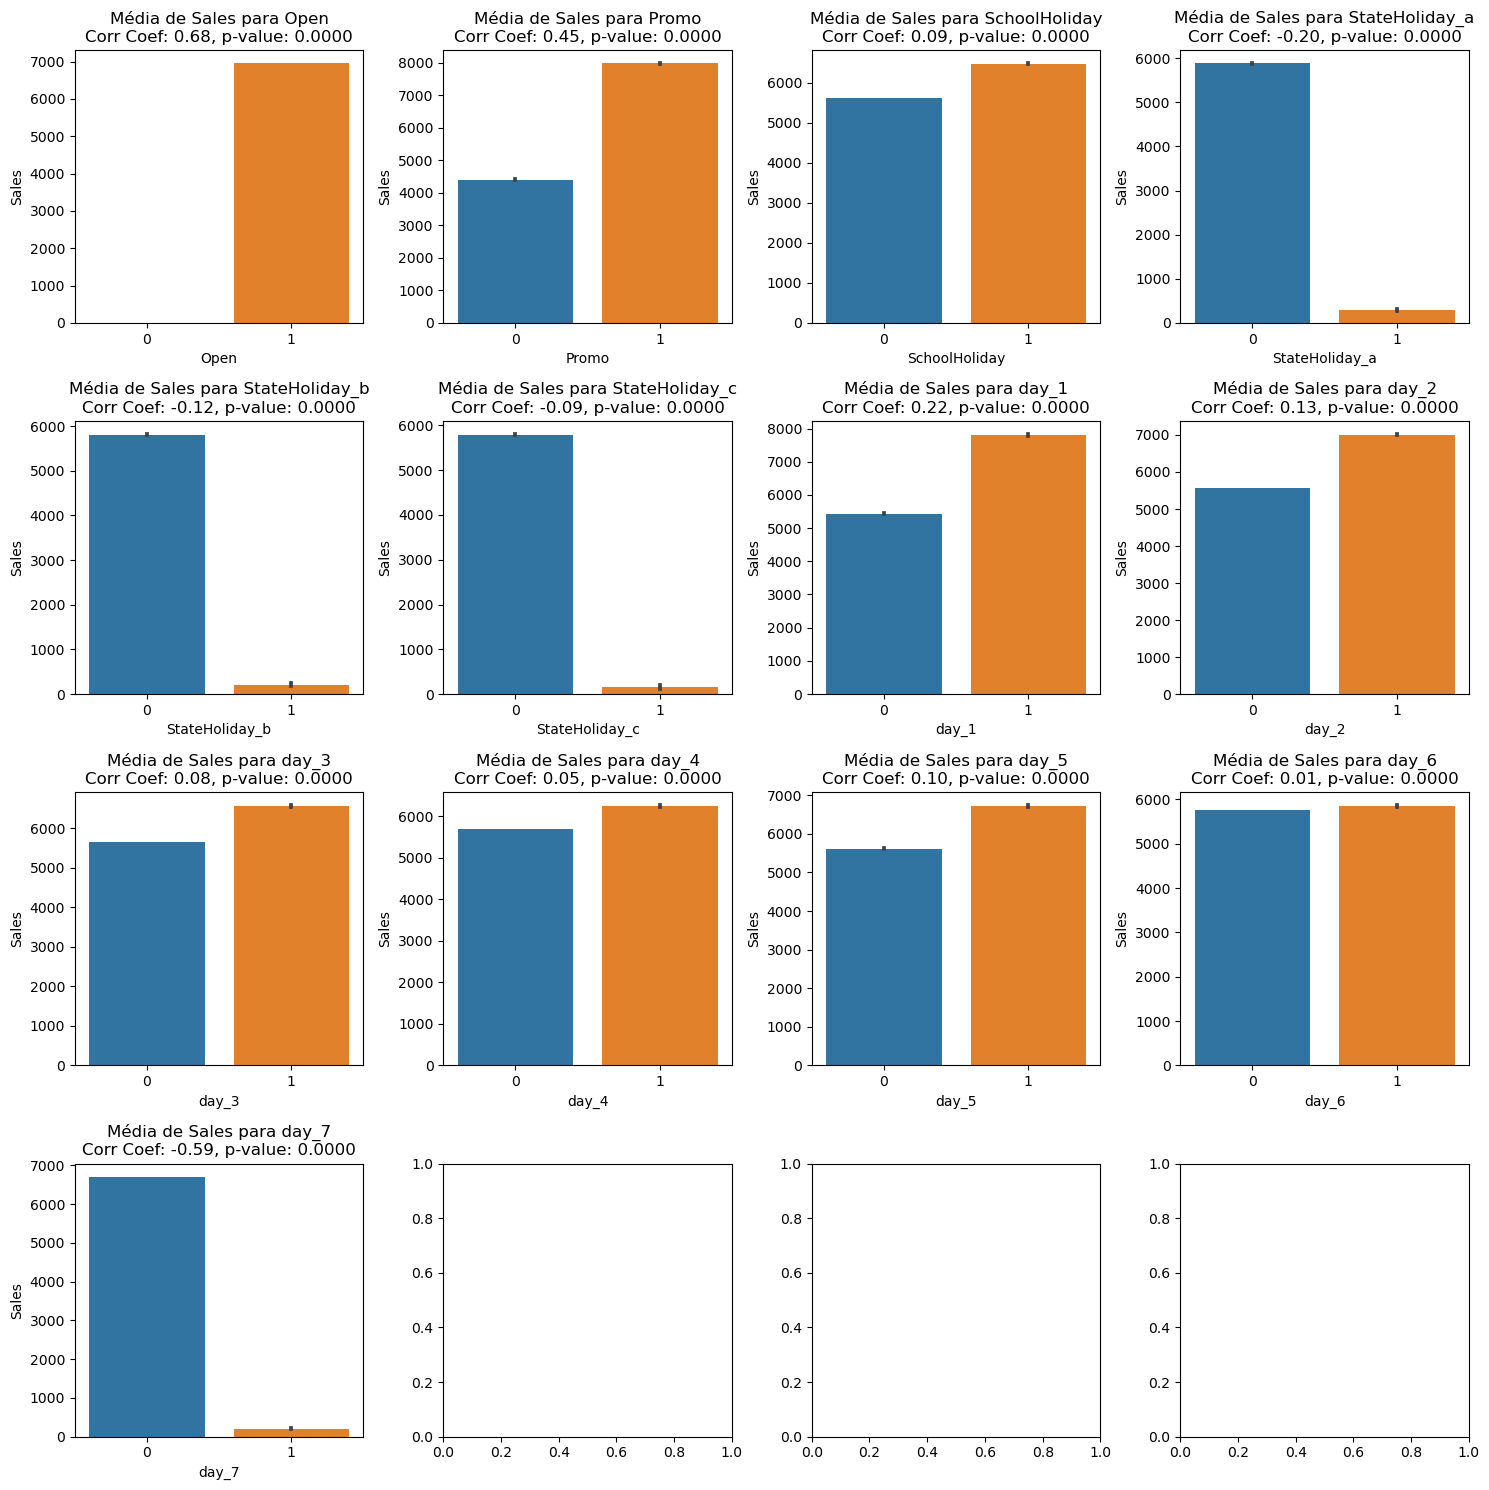

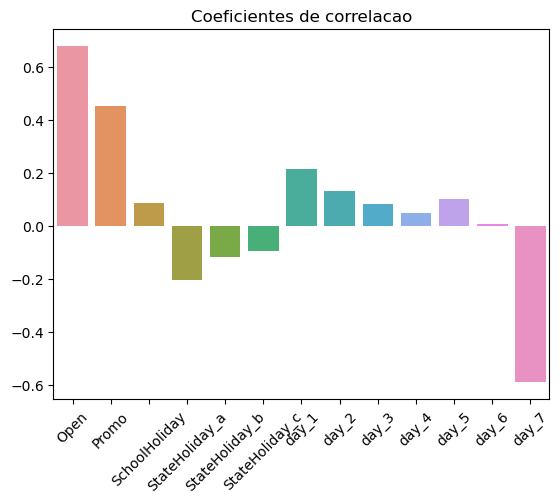

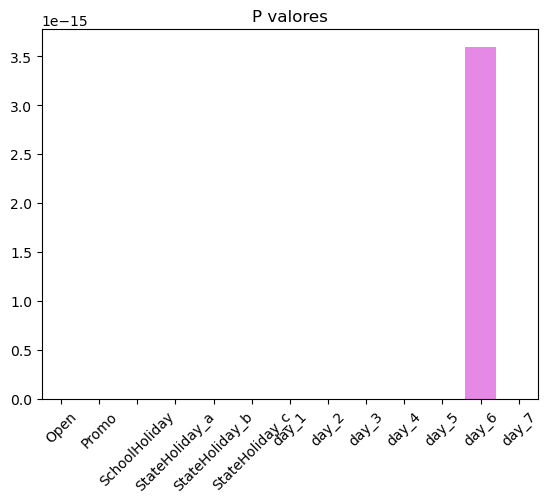

In [31]:
from scipy.stats import pointbiserialr

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

binary_variables = ['Open', 'Promo', 'SchoolHoliday',
                    'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'day_1', 'day_2',
                    'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Defina o número de linhas e colunas para a grade de subplots
num_rows = 4
num_cols = 4

# Configure o layout dos subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)  # Espaçamento vertical entre os subplots

corr_coefs = []
p_values = []

# Loop para calcular o coeficiente de correlação e gerar o gráfico para cada variável binária
for i, binary_var in enumerate(binary_variables):
    row = i // num_cols
    col = i % num_cols
    
    corr_coef, p_value = pointbiserialr(x=data[binary_var], y=data['Sales'])
    
    # Crie um gráfico de barras para visualizar a média da variável numérica para cada categoria da variável binária
    sns.barplot(x=binary_var, y='Sales', data=data, ax=axes[row, col])
    axes[row, col].set_title(f'Média de Sales para {binary_var}\nCorr Coef: {corr_coef:.2f}, p-value: {p_value:.4f}')
    
    corr_coefs.append(corr_coef)
    p_values.append(p_value)

# Ajuste os subplots para evitar sobreposição de rótulos
plt.tight_layout()
plt.show()

    
plt.title('Coeficientes de correlacao')
sns.barplot(x=binary_variables, y=corr_coefs)
eixo_x = plt.gca().xaxis

# Girar os rótulos em um ângulo de 45 graus
eixo_x.set_tick_params(rotation=45)

plt.show()
plt.title('P valores')
eixo_x = plt.gca().xaxis

# Girar os rótulos em um ângulo de 45 graus
eixo_x.set_tick_params(rotation=45)
sns.barplot(x=binary_variables, y=p_values)
plt.show()

Alguns insights desses gráficos:

Primeiro, obviamente não há vendas quando a loja está fechada. Isto mostra que os dados são consistentes. Promoção parece aumentar as vendas. Feriados escolares não afetam, mas feriados estaduais afetam muito ( provavelmente pela loja estar fechada), e nos dias, parece haver alguma relacao.

In [32]:
p_values

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.592659721920986e-15,
 0.0]

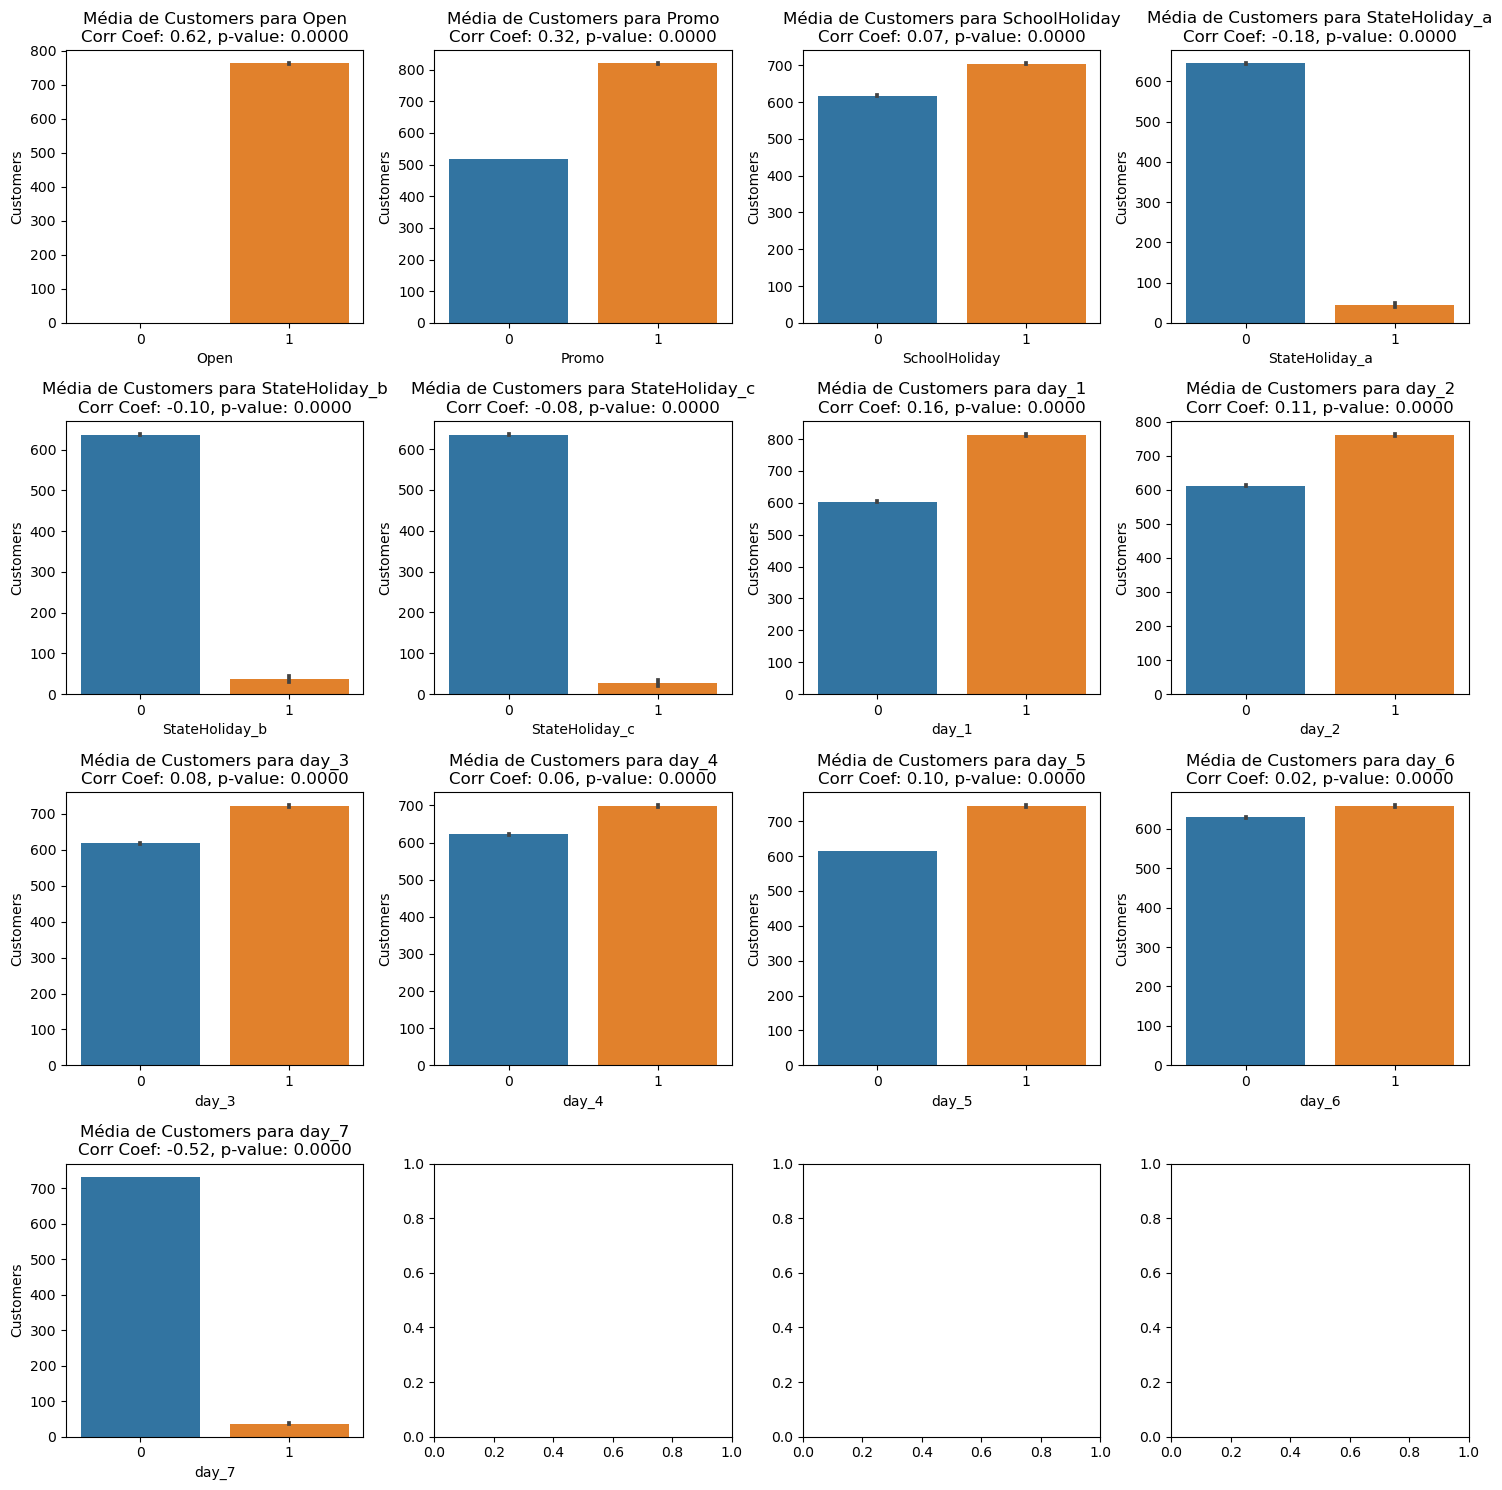

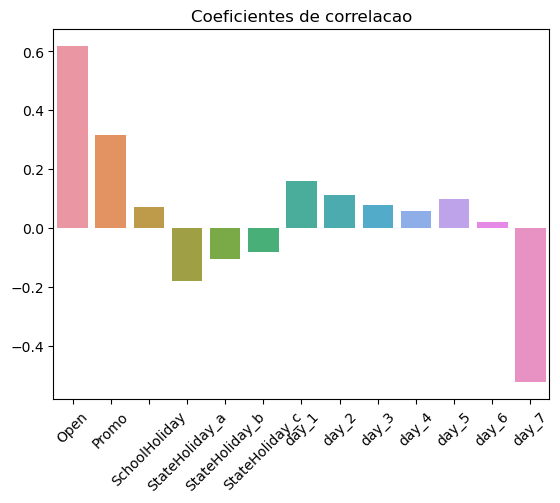

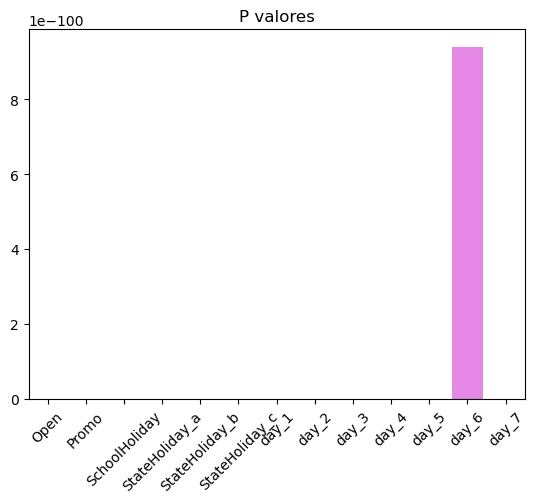

In [33]:
from scipy.stats import pointbiserialr

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

binary_variables = ['Open', 'Promo', 'SchoolHoliday',
                    'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'day_1', 'day_2',
                    'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Defina o número de linhas e colunas para a grade de subplots
num_rows = 4
num_cols = 4

# Configure o layout dos subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)  # Espaçamento vertical entre os subplots

corr_coefs = []
p_values = []

# Loop para calcular o coeficiente de correlação e gerar o gráfico para cada variável binária
for i, binary_var in enumerate(binary_variables):
    row = i // num_cols
    col = i % num_cols
    
    corr_coef, p_value = pointbiserialr(x=data[binary_var], y=data['Customers'])
    
    # Crie um gráfico de barras para visualizar a média da variável numérica para cada categoria da variável binária
    sns.barplot(x=binary_var, y='Customers', data=data, ax=axes[row, col])
    axes[row, col].set_title(f'Média de Customers para {binary_var}\nCorr Coef: {corr_coef:.2f}, p-value: {p_value:.4f}')
    
    corr_coefs.append(corr_coef)
    p_values.append(p_value)

# Ajuste os subplots para evitar sobreposição de rótulos
plt.tight_layout()
plt.show()

    
plt.title('Coeficientes de correlacao')
sns.barplot(x=binary_variables, y=corr_coefs)
eixo_x = plt.gca().xaxis

# Girar os rótulos em um ângulo de 45 graus
eixo_x.set_tick_params(rotation=45)

plt.show()
plt.title('P valores')
eixo_x = plt.gca().xaxis

# Girar os rótulos em um ângulo de 45 graus
eixo_x.set_tick_params(rotation=45)
sns.barplot(x=binary_variables, y=p_values)
plt.show()

As relacoes sao as mesmas que para as vendas

In [34]:
data

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,1,2015-07-31,5263,555,1,1,1,0,0,0,0,0,0,0,1,0,0
1,2,2015-07-31,6064,625,1,1,1,0,0,0,0,0,0,0,1,0,0
2,3,2015-07-31,8314,821,1,1,1,0,0,0,0,0,0,0,1,0,0
3,4,2015-07-31,13995,1498,1,1,1,0,0,0,0,0,0,0,1,0,0
4,5,2015-07-31,4822,559,1,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2013-01-01,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
1017205,1112,2013-01-01,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
1017206,1113,2013-01-01,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
1017207,1114,2013-01-01,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [35]:
# com os dados processados, vamos salvá-los
data.to_csv('/home/elias/Projects/rossman_store_sales/data/interim/train.csv')

## Preprocess test data

In [4]:
data_test = pd.read_csv('/home/elias/Projects/rossman_store_sales/data/raw/test.csv')
data_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [8]:
data_test.StateHoliday.unique()

array(['0', 'a'], dtype=object)

In [10]:
data_test = pd.get_dummies(data_test, columns=['StateHoliday'], prefix='StateHoliday').drop(columns='StateHoliday_0')
data_test

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_a
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [12]:
data_test[['StateHoliday_b', 'StateHoliday_c']] = 0
data_test = pd.get_dummies(data_test, columns=['DayOfWeek'], prefix='day')
data_test

,Id,Store,Date,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,1,1,2015-09-17,1.0,1,0,0,0,0,0,0,0,1,0,0,0
1,2,3,2015-09-17,1.0,1,0,0,0,0,0,0,0,1,0,0,0
2,3,7,2015-09-17,1.0,1,0,0,0,0,0,0,0,1,0,0,0
3,4,8,2015-09-17,1.0,1,0,0,0,0,0,0,0,1,0,0,0
4,5,9,2015-09-17,1.0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,2015-08-01,1.0,0,0,0,0,0,0,0,0,0,0,1,0
41084,41085,1112,2015-08-01,1.0,0,0,0,0,0,0,0,0,0,0,1,0
41085,41086,1113,2015-08-01,1.0,0,0,0,0,0,0,0,0,0,0,1,0
41086,41087,1114,2015-08-01,1.0,0,0,0,0,0,0,0,0,0,0,1,0


In [15]:
data_test.isna().sum()

Id                 0
Store              0
Date               0
Open              11
Promo              0
SchoolHoliday      0
StateHoliday_a     0
StateHoliday_b     0
StateHoliday_c     0
day_1              0
day_2              0
day_3              0
day_4              0
day_5              0
day_6              0
day_7              0
dtype: int64

In [14]:
data_test.loc[data_test.Open.isna()]

,Id,Store,Date,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,day_1,day_2,day_3,day_4,day_5,day_6,day_7
479,480,622,2015-09-17,NaN,1,0,0,0,0,0,0,0,1,0,0,0
1335,1336,622,2015-09-16,NaN,1,0,0,0,0,0,0,1,0,0,0,0
2191,2192,622,2015-09-15,NaN,1,0,0,0,0,0,1,0,0,0,0,0
3047,3048,622,2015-09-14,NaN,1,0,0,0,0,1,0,0,0,0,0,0
4759,4760,622,2015-09-12,NaN,0,0,0,0,0,0,0,0,0,0,1,0
5615,5616,622,2015-09-11,NaN,0,0,0,0,0,0,0,0,0,1,0,0
6471,6472,622,2015-09-10,NaN,0,0,0,0,0,0,0,0,1,0,0,0
7327,7328,622,2015-09-09,NaN,0,0,0,0,0,0,0,1,0,0,0,0
8183,8184,622,2015-09-08,NaN,0,0,0,0,0,0,1,0,0,0,0,0
9039,9040,622,2015-09-07,NaN,0,0,0,0,0,1,0,0,0,0,0,0


Todos da mesma loja. Vamos assumir que ela está aberta

In [16]:
data_test.Open = data_test.Open.fillna(1).astype('uint8')
data_test

,Id,Store,Date,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,1,1,2015-09-17,1,1,0,0,0,0,0,0,0,1,0,0,0
1,2,3,2015-09-17,1,1,0,0,0,0,0,0,0,1,0,0,0
2,3,7,2015-09-17,1,1,0,0,0,0,0,0,0,1,0,0,0
3,4,8,2015-09-17,1,1,0,0,0,0,0,0,0,1,0,0,0
4,5,9,2015-09-17,1,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,2015-08-01,1,0,0,0,0,0,0,0,0,0,0,1,0
41084,41085,1112,2015-08-01,1,0,0,0,0,0,0,0,0,0,0,1,0
41085,41086,1113,2015-08-01,1,0,0,0,0,0,0,0,0,0,0,1,0
41086,41087,1114,2015-08-01,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
data_test.to_csv('/home/elias/Projects/rossman_store_sales/data/interim/test.csv')